Ejemplo de clasificación. El objetivo es encontrar una superficie que separe los puntos de dos clases diferentes.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Se crean los valores de salida (etiquetas) de la función XOR

In [16]:
y_train=np.array([0,1,1,0])
y_train

array([0, 1, 1, 0])

Se crean los valores de entrada de la función XOR

In [17]:
X_train=np.vstack([(0,0),(0,1),(1,0),(1,1)])
X_train

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

Visualizamos los datos en el plano  
Lo importante a observar es que no hay forma de definir una curva que separe los puntos de la clase 0 de los puntos de la clase 1

<IPython.core.display.Javascript object>


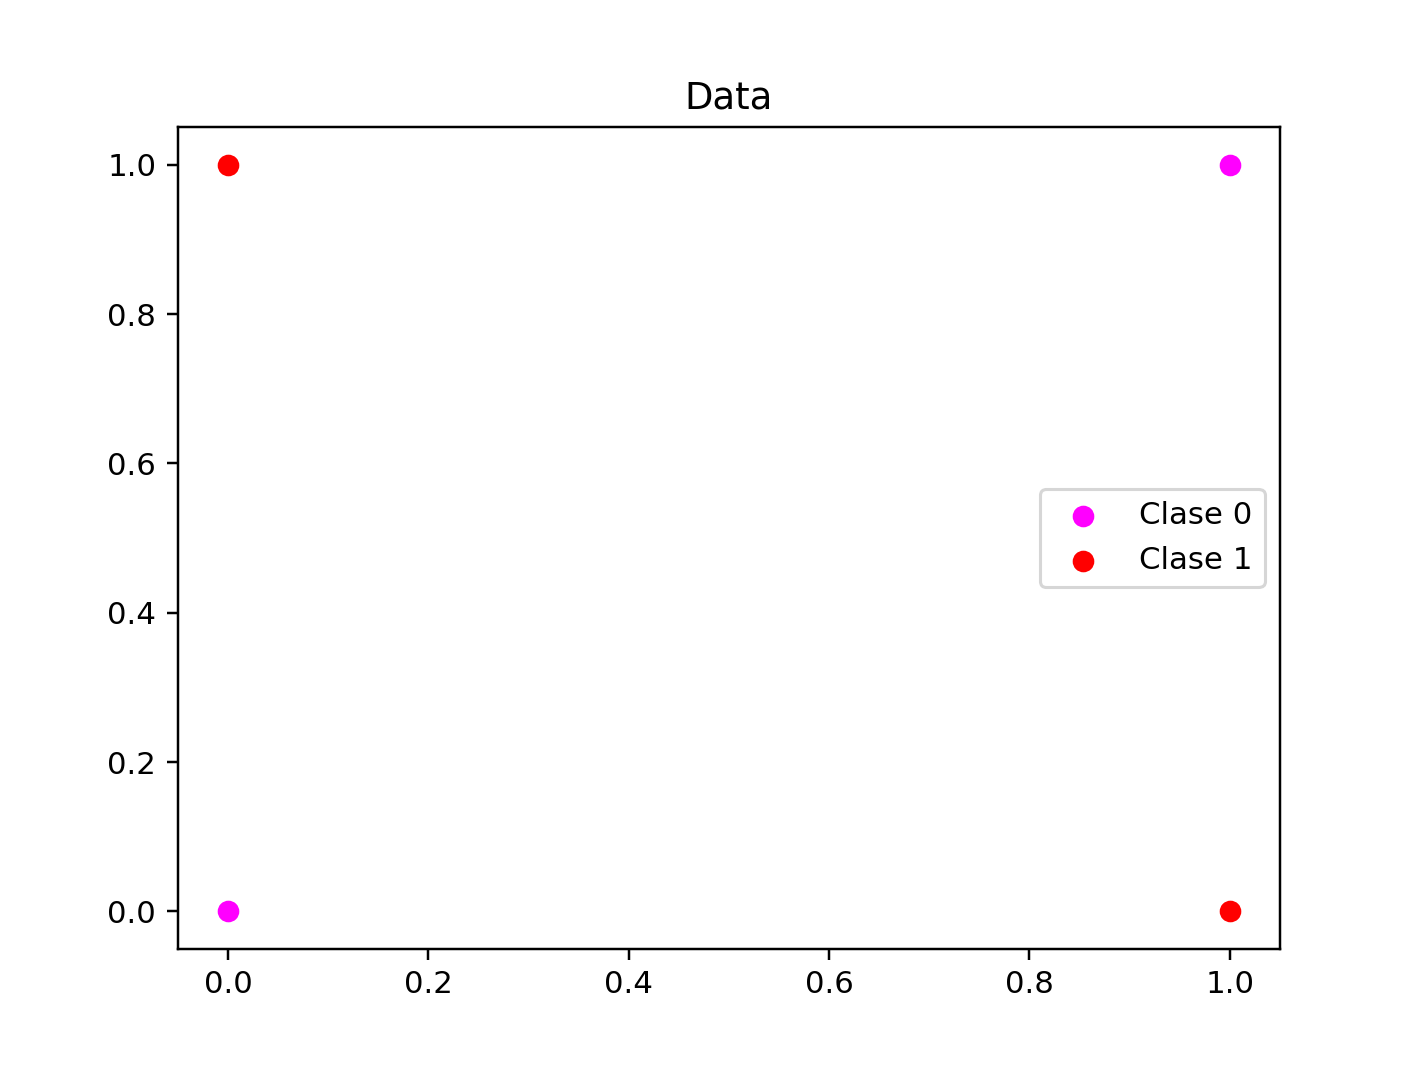

Text(0.5, 1.0, 'Data')

In [18]:
plt.figure()
X1=X_train[y_train == 0]
X2=X_train[y_train == 1]

plt.scatter(X1[:, 0], X1[:, 1], color = 'magenta')
plt.scatter(X2[:, 0], X2[:, 1], color = 'red')
plt.legend(['Clase 0', 'Clase 1'], loc="best")
plt.title("Data")

Encontramos los coeficientes que definen un plano (no curva) que es capaz de separar los puntos de ambas clases. El sistema lineal que se resuelve es conocido como las ecuaciones normales de mínimos cuadrados.

In [20]:
A = np.vstack([X_train.T, np.ones(len(X_train))]).T

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y_train)
print(alpha)


[0.00000000e+00 2.22044605e-16 5.00000000e-01]


Visualizamos el plano encontrado  
Se aprecia que el plano separa los puntos de ambas clases

<IPython.core.display.Javascript object>


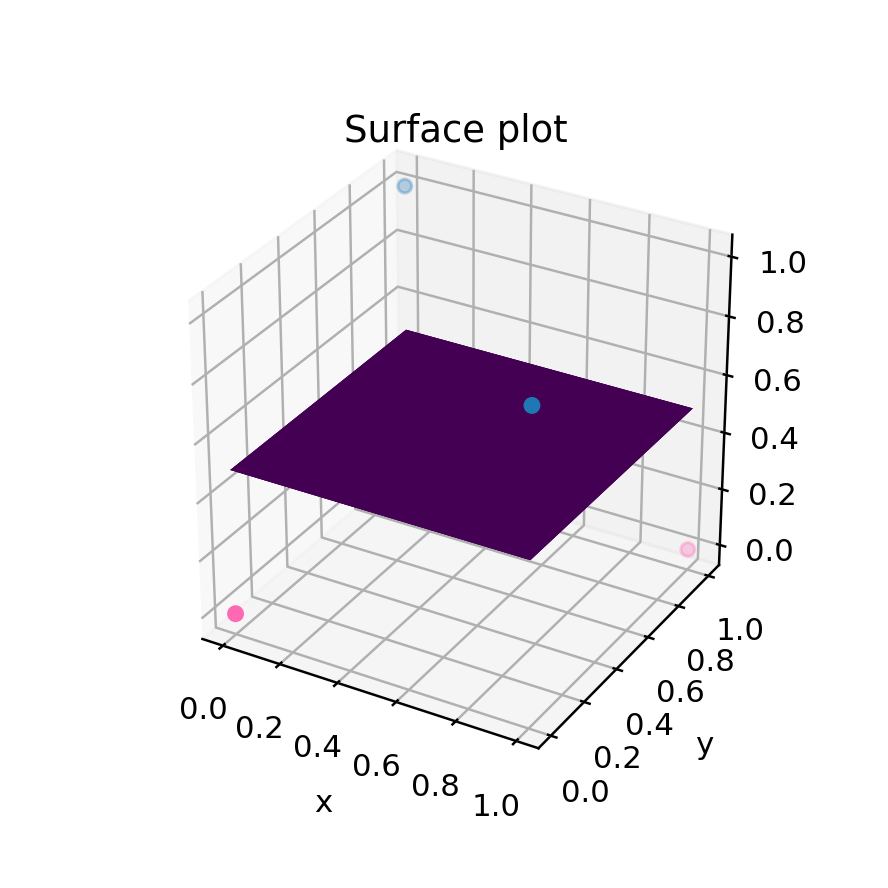

In [21]:
%matplotlib notebook

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = X_train[:,0]
y = X_train[:,1]

Xm, Ym = np.meshgrid(x, y)
z = alpha[0]*Xm + alpha[1]*Ym + alpha[2]

plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

ax.plot_surface(Xm, Ym, z,cmap='viridis', edgecolor='none')
#ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
X1=X_train[y_train == 0]
X2=X_train[y_train == 1]
y1=y_train[y_train == 0]
y2=y_train[y_train == 1]

ax.scatter(X1[:, 0], X1[:, 1], y1, color = 'hotpink')
ax.scatter(X2[:, 0], X2[:, 1], y2)
plt.xlabel('x')
plt.ylabel('y')


ax.set_title('Surface plot')
plt.show()